In [1]:
# Data manipulation  
import numpy as np  
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt  

In [18]:
st = pd.read_csv('symbols.txt', names=['symbol'], index_col=None)
sl = st['symbol'].to_list()

In [2]:

all_data = {ticker: web.get_data_yahoo(ticker) for ticker in ['AAPL', 'AMZN', 'MSFT', 'GOOG']}
# all_data = {ticker: web.get_data_yahoo(ticker) for ticker in sl}
# all_data = web.get_data_yahoo('GOOG')
price = pd.DataFrame({ticker: data['Adj Close'] for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume'] for ticker, data in all_data.items()})

In [3]:
all_data

{'AAPL':                   High         Low        Open       Close       Volume  \
 Date                                                                      
 2015-07-20  132.970001  130.699997  130.970001  132.070007   58900200.0   
 2015-07-21  132.919998  130.320007  132.850006  130.750000   76756400.0   
 2015-07-22  125.500000  121.989998  121.989998  125.220001  115450600.0   
 2015-07-23  127.089996  125.059998  126.199997  125.160004   50999500.0   
 2015-07-24  125.739998  123.900002  125.320000  124.500000   42162300.0   
 ...                ...         ...         ...         ...          ...   
 2020-07-10  383.920013  378.820007  381.339996  383.679993   22564300.0   
 2020-07-13  399.820007  381.029999  389.059998  381.910004   47912300.0   
 2020-07-14  389.019989  375.510010  379.359985  388.230011   42747300.0   
 2020-07-15  396.989990  385.959991  395.959991  390.899994   38299500.0   
 2020-07-16  389.619995  383.619995  386.250000  386.089996   27597800.0   
 
  

In [4]:
def get_stock_price(symbol):
    df = pd.DataFrame(price[symbol])
    df.columns=['close']
    return df

In [11]:
stock = get_stock_price('AAPL')

In [12]:
stock['high'] = stock['close'].shift(1).rolling(window=5).max()
stock['low'] = stock['close'].shift(1).rolling(window=5).min()
stock['avg'] = stock['close'].shift(1).rolling(window=5).mean()

In [13]:
stock['long_entry'] = stock['close'] > stock['high']
stock['short_entry'] = stock['close'] < stock['low']
stock['long_exit'] = stock['close'] < stock['avg']
stock['short_exit'] = stock['close'] > stock['avg']  

In [14]:
stock['positions_long'] = np.nan  
stock.loc[stock['long_entry'],'positions_long']= 1  
stock.loc[stock['long_exit'],'positions_long']= 0  
stock['positions_short'] = np.nan  
stock.loc[stock['short_entry'],'positions_short']= -1  
stock.loc[stock['short_exit'],'positions_short']= 0  
stock['Signal'] = stock['positions_long'] + stock['positions_short']  
stock = stock.fillna(method='ffill') 

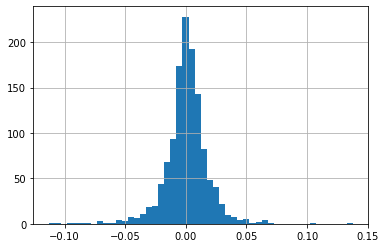

In [15]:
daily_log_returns = np.log(stock['close']/stock['close'].shift(1))  
daily_log_returns = daily_log_returns * stock.Signal.shift(1)  
# Plot the distribution of 'daily_log_returns'  
# print (stock_ticker)  
daily_log_returns.hist(bins=50)  
plt.show()  
# return daily_log_returns.cumsum() 

In [9]:
stock['close']/ stock['close'].shift(1)

Date
2015-07-17         NaN
2015-07-20    1.010538
2015-07-21    0.999795
2015-07-22    1.000553
2015-07-23    0.987527
                ...   
2020-07-09    1.032949
2020-07-10    1.005458
2020-07-13    0.970000
2020-07-14    0.993557
2020-07-15    0.975639
Name: close, Length: 1258, dtype: float64

In [10]:
 stock['close'].shift(1)

Date
2015-07-17            NaN
2015-07-20     483.010010
2015-07-21     488.100006
2015-07-22     488.000000
2015-07-23     488.269989
                 ...     
2020-07-09    3081.110107
2020-07-10    3182.629883
2020-07-13    3200.000000
2020-07-14    3104.000000
2020-07-15    3084.000000
Name: close, Length: 1258, dtype: float64

In [11]:
daily_log_returns

Date
2015-07-17         NaN
2015-07-20         NaN
2015-07-21         NaN
2015-07-22         NaN
2015-07-23         NaN
                ...   
2020-07-09    0.032418
2020-07-10    0.005443
2020-07-13   -0.030459
2020-07-14   -0.006464
2020-07-15   -0.024663
Length: 1258, dtype: float64

In [13]:
np.log(9997)

9.210040326967182

In [14]:
stock.tail(20)

,close,high,low,avg,long_entry,short_entry,long_exit,short_exit,positions_long,positions_short,Signal
Date,,,,,,,,,,,
2020-06-17,2640.979980,2647.449951,2545.020020,2587.675977,False,False,False,True,0.0,0.0,1.0
2020-06-18,2653.979980,2640.979980,2545.020020,2586.381982,True,False,False,True,1.0,0.0,1.0
2020-06-19,2675.010010,2653.979980,2545.020020,2605.585986,True,False,False,True,1.0,0.0,1.0
2020-06-22,2713.820068,2675.010010,2572.679932,2631.583984,True,False,False,True,1.0,0.0,1.0
2020-06-23,2764.409912,2713.820068,2615.270020,2659.812012,True,False,False,True,1.0,0.0,1.0
2020-06-24,2734.399902,2764.409912,2640.979980,2689.639990,False,False,False,True,1.0,0.0,1.0
2020-06-25,2754.580078,2764.409912,2653.979980,2708.323975,False,False,False,True,1.0,0.0,1.0
2020-06-26,2692.870117,2764.409912,2675.010010,2728.443994,False,False,True,False,0.0,0.0,1.0
2020-06-29,2680.379883,2764.409912,2692.870117,2732.016016,False,True,True,False,0.0,-1.0,-1.0
